In [2]:
!pip install gdown


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [4]:
import gdown

# Replace with your FILE_ID
file_id = "1txBV4cGu3IEiivzlfGyKl1oDg6PZC4fQ"
url = f"https://drive.google.com/uc?id={file_id}"

# Download zip
gdown.download(url, "kitti_dataset.zip", quiet=False)

# Unzip
!unzip kitti_dataset.zip -d ./
!ls datasets/KITTI


Downloading...
From (original): https://drive.google.com/uc?id=1txBV4cGu3IEiivzlfGyKl1oDg6PZC4fQ
From (redirected): https://drive.google.com/uc?id=1txBV4cGu3IEiivzlfGyKl1oDg6PZC4fQ&confirm=t&uuid=7211a9b8-459a-4b16-ad76-e63b63fddb17
To: /workspace/kitti_dataset.zip
100%|██████████| 6.11G/6.11G [06:27<00:00, 15.7MB/s] 


Archive:  kitti_dataset.zip
   creating: ./datasets/
   creating: ./datasets/KITTI/
   creating: ./datasets/KITTI/images/
   creating: ./datasets/KITTI/images/train/
  inflating: ./datasets/KITTI/images/train/000000.png  
  inflating: ./datasets/KITTI/images/train/000001.png  
  inflating: ./datasets/KITTI/images/train/000002.png  
  inflating: ./datasets/KITTI/images/train/000005.png  
  inflating: ./datasets/KITTI/images/train/000006.png  
  inflating: ./datasets/KITTI/images/train/000007.png  
  inflating: ./datasets/KITTI/images/train/000008.png  
  inflating: ./datasets/KITTI/images/train/000010.png  
  inflating: ./datasets/KITTI/images/train/000011.png  
  inflating: ./datasets/KITTI/images/train/000012.png  
  inflating: ./datasets/KITTI/images/train/000014.png  
  inflating: ./datasets/KITTI/images/train/000015.png  
  inflating: ./datasets/KITTI/images/train/000016.png  
  inflating: ./datasets/KITTI/images/train/000018.png  
  inflating: ./datasets/KITTI/images/train/000019.

In [6]:
import os

# Define paths
base_path = "datasets/KITTI"
splits = ["train", "val"]

for split in splits:
    img_dir = os.path.join(base_path, "images", split)
    lbl_dir = os.path.join(base_path, "labels", split)

    # Count files
    img_files = sorted([os.path.splitext(f)[0] for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))])
    lbl_files = sorted([os.path.splitext(f)[0] for f in os.listdir(lbl_dir) if os.path.isfile(os.path.join(lbl_dir, f))])

    print(f"\n=== {split.upper()} SPLIT ===")
    print(f"Images: {len(img_files)}")
    print(f"Labels: {len(lbl_files)}")

    # Sanity check: matching names
    missing_labels = set(img_files) - set(lbl_files)
    missing_images = set(lbl_files) - set(img_files)

    if not missing_labels and not missing_images:
        print(" All images and labels are properly paired.")
    else:
        if missing_labels:
            print(f" Missing labels for {len(missing_labels)} images.")
        if missing_images:
            print(f" Missing images for {len(missing_images)} labels.")



=== TRAIN SPLIT ===
Images: 5984
Labels: 5984
 All images and labels are properly paired.

=== VAL SPLIT ===
Images: 1497
Labels: 1497
 All images and labels are properly paired.


In [7]:
import os

# Define paths
base_path = "datasets/KITTI"
splits = ["train", "val"]

for split in splits:
    lbl_dir = os.path.join(base_path, "labels", split)

    empty_labels = []
    for f in os.listdir(lbl_dir):
        fpath = os.path.join(lbl_dir, f)
        if os.path.isfile(fpath):
            # Check if file is empty or only whitespace
            if os.stat(fpath).st_size == 0:
                empty_labels.append(f)
            else:
                with open(fpath, "r") as lf:
                    if lf.read().strip() == "":
                        empty_labels.append(f)

    print(f"\n=== {split.upper()} SPLIT ===")
    if empty_labels:
        print(f" Found {len(empty_labels)} empty label files:")
        print(empty_labels[:10], "...")  # show first 10 only
    else:
        print(" No empty label files found.")



=== TRAIN SPLIT ===
 No empty label files found.

=== VAL SPLIT ===
 No empty label files found.


In [8]:
import torch
import os

print("Torch version:", torch.__version__)
print("GPU available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")

Torch version: 2.5.1+cu121
GPU available: True
GPU name: NVIDIA A100-SXM4-80GB


In [9]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install required dependencies
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17533, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 17533 (delta 15), reused 1 (delta 0), pack-reused 17498 (from 4)
Receiving objects: 100% (17533/17533), 16.67 MiB | 16.90 MiB/s, done.
Resolving deltas: 100% (12007/12007), done.
/workspace/yolov5


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [gitpython]


In [11]:
!pip install scikit-learn==1.5.0


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 62.1 MB/s  0:00:00eta 0:00:01


In [12]:
import torch, torchvision, numpy, pandas, sklearn, pyarrow, cv2, yaml, matplotlib, tqdm, seaborn, scipy, platform

print("=== Environment Versions ===")
print("Python:", platform.python_version())
print("Torch:", torch.__version__, f"(CUDA: {torch.version.cuda}, Available: {torch.cuda.is_available()})")
print("TorchVision:", torchvision.__version__)
print("NumPy:", numpy.__version__)
print("Pandas:", pandas.__version__)
print("Scikit-learn:", sklearn.__version__)
print("PyArrow:", pyarrow.__version__)
print("OpenCV:", cv2.__version__)
print("PyYAML:", yaml.__version__)
print("Matplotlib:", matplotlib.__version__)
print("tqdm:", tqdm.__version__)
print("Seaborn:", seaborn.__version__)
print("SciPy:", scipy.__version__)


=== Environment Versions ===
Python: 3.10.12
Torch: 2.5.1+cu121 (CUDA: 12.1, Available: True)
TorchVision: 0.20.1+cu121
NumPy: 1.26.4
Pandas: 2.2.2
Scikit-learn: 1.5.0
PyArrow: 14.0.2
OpenCV: 4.10.0
PyYAML: 6.0.1
Matplotlib: 3.9.2
tqdm: 4.66.4
Seaborn: 0.13.2
SciPy: 1.15.3


In [20]:
import os
from pathlib import Path

print("Current working directory:", os.getcwd())
print("Does datasets/KITTI exist?", Path("datasets/KITTI").exists())
print("Train labels path:", Path("datasets/KITTI/labels/train").resolve())
print("Exists?", Path("datasets/KITTI/labels/train").exists())


Current working directory: /workspace/yolov5
Does datasets/KITTI exist? False
Train labels path: /workspace/yolov5/datasets/KITTI/labels/train
Exists? False


In [21]:
dataset_root = "/workspace/datasets/KITTI"


In [22]:
!ls /workspace/datasets/KITTI


images	labels


In [28]:
cd /workspace


/workspace


In [47]:
%cd /workspace
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


/workspace
Cloning into 'yolov5'...
remote: Enumerating objects: 17533, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 17533 (delta 15), reused 1 (delta 0), pack-reused 17498 (from 4)
Receiving objects: 100% (17533/17533), 16.61 MiB | 16.58 MiB/s, done.
Resolving deltas: 100% (12004/12004), done.
/workspace/yolov5
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [48]:
import torch, torchvision, numpy, pandas, sklearn, pyarrow, cv2, yaml, matplotlib, tqdm, seaborn, scipy, platform

print("=== Environment Versions ===")
print("Python:", platform.python_version())
print("Torch:", torch.__version__, f"(CUDA: {torch.version.cuda}, Available: {torch.cuda.is_available()})")
print("TorchVision:", torchvision.__version__)
print("NumPy:", numpy.__version__)
print("Pandas:", pandas.__version__)
print("Scikit-learn:", sklearn.__version__)
print("PyArrow:", pyarrow.__version__)
print("OpenCV:", cv2.__version__)
print("PyYAML:", yaml.__version__)
print("Matplotlib:", matplotlib.__version__)
print("tqdm:", tqdm.__version__)
print("Seaborn:", seaborn.__version__)
print("SciPy:", scipy.__version__)


=== Environment Versions ===
Python: 3.10.12
Torch: 2.5.1+cu121 (CUDA: 12.1, Available: True)
TorchVision: 0.20.1+cu121
NumPy: 1.26.4
Pandas: 2.2.2
Scikit-learn: 1.5.0
PyArrow: 14.0.2
OpenCV: 4.10.0
PyYAML: 6.0.1
Matplotlib: 3.9.2
tqdm: 4.66.4
Seaborn: 0.13.2
SciPy: 1.15.3


In [1]:
import time
from pathlib import Path
import sys

# === YOLOv5 path ===
yolov5_path = "/workspace/yolov5"
if yolov5_path not in sys.path:
    sys.path.append(yolov5_path)

from train import run  # YOLOv5 training entry point

# === Parameters ===
dataset_yaml = "/workspace/datasets/KITTI/kitti.yaml"
project_dir = "/workspace/yolov5/runs/train"
run_name = "yolov5n_full_research222"

# Training settings
epochs = 5                # max epochs; early stopping may stop earlier
imgsz = 1280                # research-level resolution
batch_size = 64             # adjust according to GPU VRAM
workers = 2                 # safer for shared memory
device = 0
weights = "yolov5n.pt"      # starting weights
amp = True                   # mixed precision
save_interval = 2           # save checkpoint every N epochs
patience = 10                # early stopping patience

# === Ensure folder exists ===
run_folder = Path(project_dir) / run_name
run_folder.mkdir(parents=True, exist_ok=True)

# === Start training ===
start_time = time.time()
print(f"Training in fixed folder '{run_folder}' for {epochs} epochs...\n")

run(
    data=dataset_yaml,
    imgsz=imgsz,
    batch_size=batch_size,
    workers=workers,
    device=device,
    weights=weights,
    epochs=epochs,
    project=project_dir,
    name=run_name,
    cache=True,
    amp=amp,
    save_period=save_interval,
    patience=patience,
    exist_ok=True 
)

training_time = time.time() - start_time
print(f"Training completed in {training_time/3600:.2f} hours")
print(f"Results saved to: {run_folder}")


2025-08-17 20:30:50.072537: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755462650.092549  373601 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755462650.098696  373601 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755462650.115159  373601 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755462650.115177  373601 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755462650.115179  373601 computation_placer.cc:177] computation placer alr

Training in fixed folder '/workspace/yolov5/runs/train/yolov5n_full_research222' for 5 epochs...



github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-425-g85acef3a Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5 🚀 runs in Comet
TensorBoard: Start with 'tensorboard --logdir /workspace/yolov5/runs/train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=7

                 from  n    params  module                                  arguments                     
  0                -1  1      1760  models.common.Conv                      [3, 16, 6, 2, 2]    

KeyboardInterrupt: 

In [ ]:
import time
from pathlib import Path
import sys

# === YOLOv5 path ===
yolov5_path = "/workspace/yolov5"
if yolov5_path not in sys.path:
    sys.path.append(yolov5_path)

from train import run  # YOLOv5 training entry point

# === Parameters ===
dataset_yaml = "/workspace/datasets/KITTI/kitti.yaml"
project_dir = "/workspace/yolov5/runs/train"
run_name = "yolov5n_full_research"

# Training settings
epochs = 200                # max epochs; early stopping may stop earlier
imgsz = 1280                # research-level resolution
batch_size = 64             # adjust according to GPU VRAM
workers = 2                 # safer for shared memory
device = 0
weights = "yolov5n.pt"      # starting weights
amp = True                   # mixed precision
save_interval = 40           # save checkpoint every N epochs
patience = 10                # early stopping patience

# === Ensure folder exists ===
run_folder = Path(project_dir) / run_name
run_folder.mkdir(parents=True, exist_ok=True)

# === Start training ===
start_time = time.time()
print(f"Training in fixed folder '{run_folder}' for {epochs} epochs...\n")

run(
    data=dataset_yaml,
    imgsz=imgsz,
    batch_size=batch_size,
    workers=workers,
    device=device,
    weights=weights,
    epochs=epochs,
    project=project_dir,
    name=run_name,
    cache=True,
    amp=amp,
    save_period=save_interval,
    patience=patience,
    exist_ok=True 
)

training_time = time.time() - start_time
print(f"Training completed in {training_time/3600:.2f} hours")
print(f"Results saved to: {run_folder}")


2025-08-17 20:32:23.580138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755462743.600085  374190 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755462743.606213  374190 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755462743.622541  374190 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755462743.622564  374190 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755462743.622566  374190 computation_placer.cc:177] computation placer alr

Training in fixed folder '/workspace/yolov5/runs/train/yolov5n_full_research' for 200 epochs...



github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-425-g85acef3a Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5 🚀 runs in Comet
TensorBoard: Start with 'tensorboard --logdir /workspace/yolov5/runs/train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=7

                 from  n    params  module                                  arguments                     
  0                -1  1      1760  models.common.Conv                      [3, 16, 6, 2, 2]    

In [2]:
import sys
from pathlib import Path
import torch
import time

# ------------------- Paths -------------------
yolov5_path = "/workspace/yolov5"
if yolov5_path not in sys.path:
    sys.path.append(yolov5_path)

from val import run
from models.common import DetectMultiBackend

weights = "/workspace/yolov5/runs/train/yolov5n_full_research/weights/best.pt"
dataset_yaml = "/workspace/datasets/KITTI/kitti.yaml"
results_dir = "/workspace/yolov5/runs/val/yolov5n_metrics"

# ------------------- Device -------------------
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# ------------------- Load model -------------------
model = DetectMultiBackend(weights, device=device)
params = sum(p.numel() for p in model.model.parameters())
params_mb = params * 4 / (1024**2)  # float32 -> 4 bytes
model_size_mb = Path(weights).stat().st_size / 1024**2  # file size in MB

print(f"Model size (file): {model_size_mb:.2f} MB")
print(f"Model parameters: {params_mb:.2f} MB")

# ------------------- FPS Measurement -------------------
dummy_input = torch.randn(1, 3, 1280, 1280).to(device)
# Warm-up
for _ in range(5):
    _ = model.model(dummy_input)

n_runs = 50
start_time = time.time()
for _ in range(n_runs):
    _ = model.model(dummy_input)
end_time = time.time()

fps = n_runs / (end_time - start_time)
print(f"Inference FPS (1280x1280): {fps:.2f}")

# ------------------- Run Validation -------------------
print("\nRunning YOLOv5 validation...")
start_val_time = time.time()
run(
    data=dataset_yaml,
    weights=weights,
    imgsz=1280,
    batch_size=64,
    device=device,
    project=results_dir,
    name="eval_metrics",
    save_json=True,
    exist_ok=True,
    verbose=True
)
end_val_time = time.time()

val_time = end_val_time - start_val_time
print(f"Validation time: {val_time:.2f} seconds")
print(f"Validation results saved to {results_dir}")


Fusing layers... 
Model summary: 157 layers, 1768636 parameters, 0 gradients, 4.2 GFLOPs


Model size (file): 3.79 MB
Model parameters: 6.75 MB


YOLOv5 🚀 v7.0-425-g85acef3a Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)

Fusing layers... 


Inference FPS (1280x1280): 205.12

Running YOLOv5 validation...


Model summary: 157 layers, 1768636 parameters, 0 gradients, 4.2 GFLOPs
val: Scanning /workspace/datasets/KITTI/labels/val.cache... 1497 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1497/1497 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 24/24 [00:20<00:00,  1.19it/s]
                   all       1497       7772      0.919      0.861      0.922      0.683
                   Car       1497       5680      0.966      0.938      0.981      0.814
                   Van       1497        563      0.953      0.948      0.972      0.784
                 Truck       1497        198      0.968      0.924      0.971      0.799
            Pedestrian       1497        896      0.932      0.786      0.887      0.514
        Person_sitting       1497         30      0.726      0.633      0.747      0.473
               Cyclist       1497        306       0.95      0.866      0.943      0.662
                  Tram   

loading annotations into memory...
Validation time: 25.55 seconds
Validation results saved to /workspace/yolov5/runs/val/yolov5n_metrics


In [4]:
import numpy as np
import pandas as pd

# -----------------------------
# CONFIGURATION
# -----------------------------
class_names = ["Car", "Van", "Truck", "Pedestrian", "Person_sitting", "Cyclist", "Tram"]
num_classes = len(class_names)

# -----------------------------
# CONFUSION MATRIX (predicted rows x true cols)
# Replace with your actual values from YOLOv5 PNG/log
# -----------------------------
conf_matrix = np.array([
    [5461, 16, 0, 0, 0, 4, 0, 551],
    [11, 532, 1, 0, 0, 0, 0, 101],
    [0, 2, 186, 0, 0, 0, 0, 32],
    [3, 0, 0, 770, 0, 1, 0, 179],
    [0, 0, 0, 1, 20, 0, 0, 16],
    [0, 0, 0, 3, 1, 280, 0, 51],
    [0, 2, 3, 0, 0, 0, 95, 11],
    [205, 11, 8, 122, 9, 21, 4, 0]
])

# -----------------------------
# PER-CLASS YOLOv5 LOG
# -----------------------------
per_class_precision = [0.966, 0.953, 0.968, 0.932, 0.726, 0.95, 0.939]  
per_class_recall =    [0.938, 0.948, 0.924, 0.786, 0.633, 0.866, 0.929]  
per_class_map50 = [0.981, 0.972, 0.971, 0.887, 0.747, 0.943, 0.951]
per_class_map5095 = [0.814, 0.784, 0.799, 0.514, 0.473, 0.662, 0.738]

# -----------------------------
# COMPUTE METRICS
# -----------------------------
metrics_data = []
total_samples = np.sum(conf_matrix)

for i, cname in enumerate(class_names):
    TP = conf_matrix[i, i]
    FP = np.sum(conf_matrix[i, :]) - TP
    FN = np.sum(conf_matrix[:, i]) - TP
    TN = total_samples - (TP + FP + FN)

    #Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    #Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    Precision = per_class_precision[i] 
    Recall = per_class_recall[i]        
    F1 = 2 * Precision * Recall / (Precision + Recall) if (Precision + Recall) > 0 else 0
    Accuracy = (TP + TN) / total_samples if total_samples > 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    FNR = FN / (FN + TP) if (FN + TP) > 0 else 0

    metrics_data.append({
        "Class": cname,
        "TP": int(TP),
        "FP": int(FP),
        "FN": int(FN),
        "TN": int(TN),
        "Precision": round(per_class_precision[i], 4),
        "Recall": round(per_class_recall[i], 4),
        "F1 Score": round(F1, 4),
        "Accuracy": round(Accuracy, 4),
        "FPR": round(FPR, 4),
        "FNR": round(FNR, 4),
        "mAP@0.5": per_class_map50[i],
        "mAP@0.5:0.95": per_class_map5095[i]
    })

# -----------------------------
# OVERALL ROW
# -----------------------------
TP_total = sum(row["TP"] for row in metrics_data)
FP_total = sum(row["FP"] for row in metrics_data)
FN_total = sum(row["FN"] for row in metrics_data)
TN_total = sum(row["TN"] for row in metrics_data)

overall = {
    "Class": "Overall",
    "TP": TP_total,
    "FP": FP_total,
    "FN": FN_total,
    "TN": TN_total,
    "Precision": np.mean([row["Precision"] for row in metrics_data]),
    "Recall": np.mean([row["Recall"] for row in metrics_data]),
    "F1 Score": np.mean([row["F1 Score"] for row in metrics_data]),
    "Accuracy": np.mean([row["Accuracy"] for row in metrics_data]),
    "FPR": np.mean([row["FPR"] for row in metrics_data]),
    "FNR": np.mean([row["FNR"] for row in metrics_data]),
    "mAP@0.5": np.mean([row["mAP@0.5"] for row in metrics_data]),
    "mAP@0.5:0.95": np.mean([row["mAP@0.5:0.95"] for row in metrics_data])
}

metrics_data.append(overall)

# -----------------------------
# SAVE TO CSV
# -----------------------------
df_metrics = pd.DataFrame(metrics_data)
df_metrics.to_csv("yolov5_final_metrics.csv", index=False)
print(df_metrics)


            Class    TP   FP   FN     TN  ...  Accuracy       FPR       FNR  \
0             Car  5461  571  219   2462  ...  0.909300  0.188300  0.038600   
1             Van   532  113   31   8037  ...  0.983500  0.013900  0.055100   
2           Truck   186   34   12   8481  ...  0.994700  0.004000  0.060600   
3      Pedestrian   770  183  126   7634  ...  0.964500  0.023400  0.140600   
4  Person_sitting    20   17   10   8666  ...  0.996900  0.002000  0.333300   
5         Cyclist   280   55   26   8352  ...  0.990700  0.006500  0.085000   
6            Tram    95   16    4   8598  ...  0.997700  0.001900  0.040400   
7         Overall  7344  989  428  52230  ...  0.976757  0.034286  0.107657   

    mAP@0.5  mAP@0.5:0.95  
0  0.981000      0.814000  
1  0.972000      0.784000  
2  0.971000      0.799000  
3  0.887000      0.514000  
4  0.747000      0.473000  
5  0.943000      0.662000  
6  0.951000      0.738000  
7  0.921714      0.683429  

[8 rows x 13 columns]


In [2]:
import torch
import cv2
from yolov5.models.common import DetectMultiBackend
from yolov5.utils.general import non_max_suppression
from yolov5.utils.torch_utils import select_device

weights_path = "yolov5/runs/train/yolov5n_full_research/weights/best.pt"
image_path = "14.jpg"

# Device
device = select_device("0")

# Load model
model = DetectMultiBackend(weights_path, device=device)
model.eval()
names = model.names

# Load image
img0 = cv2.imread(image_path)
img = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)

# Resize to multiples of 32
h0, w0 = img.shape[:2]
new_h = (h0 // 32) * 32
new_w = (w0 // 32) * 32
img_resized = cv2.resize(img, (new_w, new_h))

# Convert to tensor
img_tensor = torch.from_numpy(img_resized).float().permute(2, 0, 1).unsqueeze(0) / 255.0
img_tensor = img_tensor.to(device)

# Inference
pred = model(img_tensor)
pred = non_max_suppression(pred, conf_thres=0.25, iou_thres=0.45)

# Scale boxes manually
for det in pred:
    if len(det):
        det[:, [0,2]] *= w0 / new_w  # scale x coords
        det[:, [1,3]] *= h0 / new_h  # scale y coords
        for *xyxy, conf, cls in det.cpu().numpy():
            x1, y1, x2, y2 = map(int, xyxy)
            label = names[int(cls)]
            cv2.rectangle(img0, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(img0, f"{label} {conf:.2f}", (x1, y1-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)

# Show result
cv2.imshow("YOLOv5 Inference", img0)
cv2.waitKey(0)
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'utils'

Fusing layers... 
Model summary: 157 layers, 1768636 parameters, 0 gradients, 4.2 GFLOPs


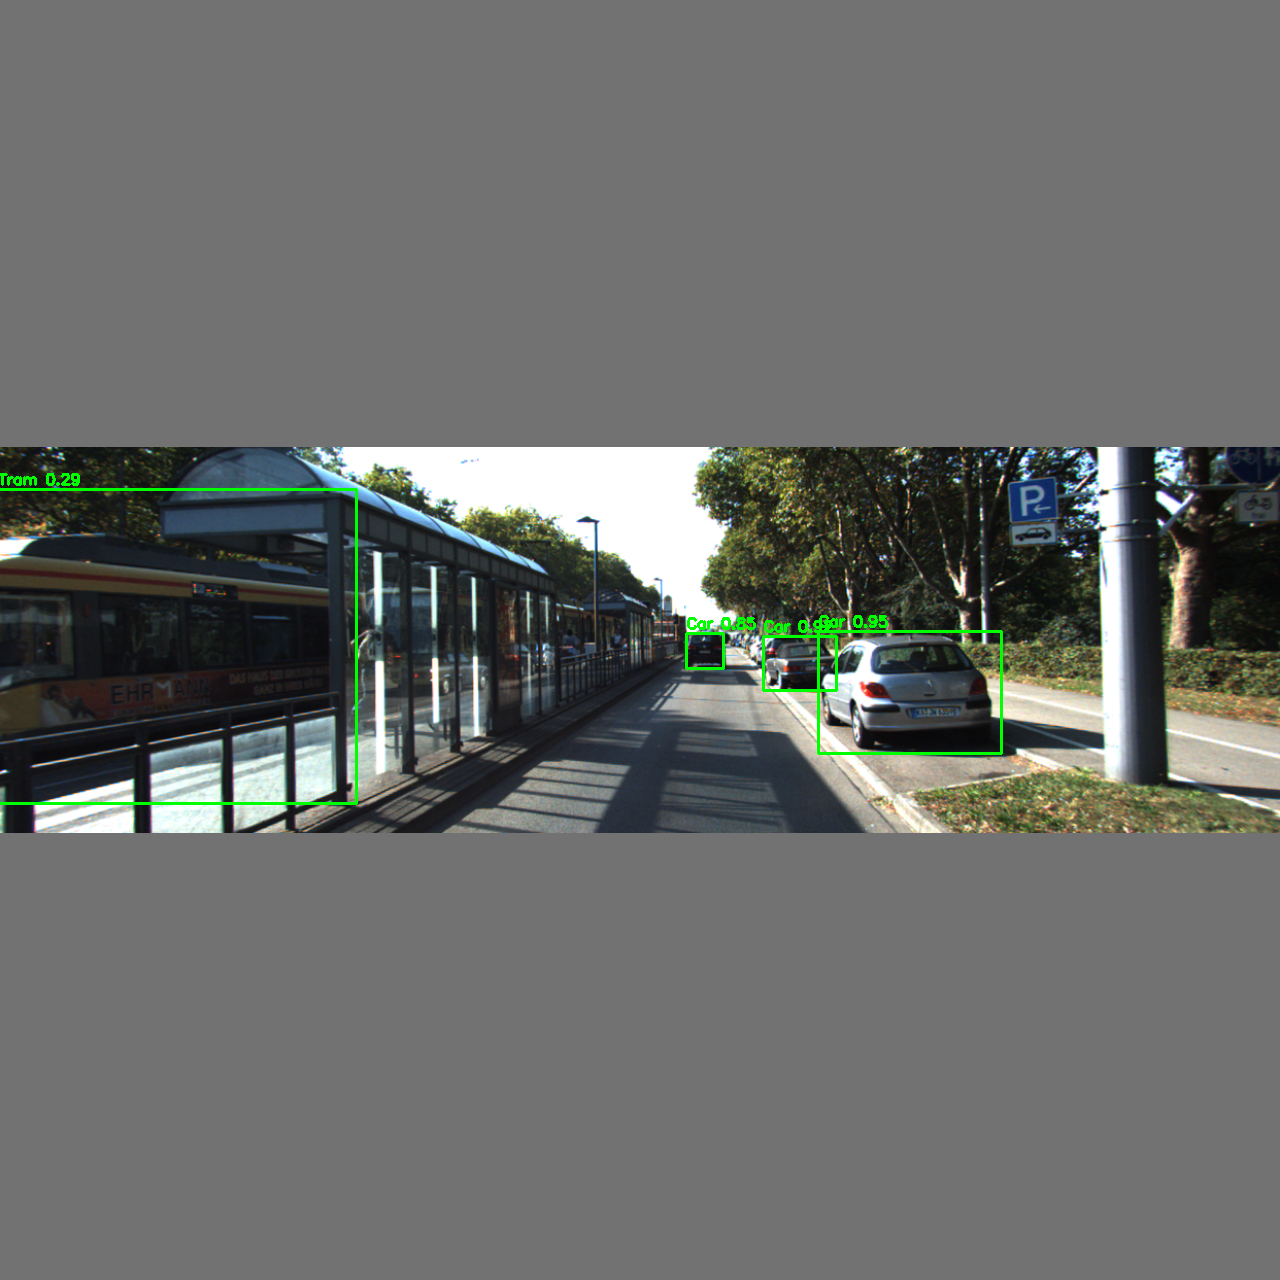

In [12]:
import torch
from yolov5.models.common import DetectMultiBackend
from yolov5.utils.general import non_max_suppression
import cv2
from PIL import Image

# -------------------------
# Paths
# -------------------------
weights_path = "yolov5/runs/train/yolov5n_full_research/weights/best.pt"
image_path = "000007.png"

# -------------------------
# Device (torch.device)
# -------------------------
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# -------------------------
# Load model
# -------------------------
model = DetectMultiBackend(weights_path, device=device)
model.eval()  # set to eval mode
class_names = model.names  # get class names from the model

# -------------------------
# Load image
# -------------------------
import cv2

def letterbox(img, new_shape=(1280,1280), color=(114,114,114)):
    # Resize image and pad to multiple of 32
    shape = img.shape[:2]  # current shape (h, w)
    r = min(new_shape[0]/shape[0], new_shape[1]/shape[1])
    new_unpad = int(round(shape[1]*r)), int(round(shape[0]*r))
    dw, dh = new_shape[1]-new_unpad[0], new_shape[0]-new_unpad[1]
    dw /= 2
    dh /= 2
    img_resized = cv2.resize(img, new_unpad)
    top, bottom = int(round(dh-0.1)), int(round(dh+0.1))
    left, right = int(round(dw-0.1)), int(round(dw+0.1))
    img_padded = cv2.copyMakeBorder(img_resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return img_padded

img = cv2.imread("000007.png")
img = letterbox(img, new_shape=(1280,1280))

img_tensor = torch.from_numpy(img).permute(2,0,1).float() / 255.0
img_tensor = img_tensor.unsqueeze(0).to(device)


# -------------------------
# Inference
# -------------------------
pred = model(img_tensor)
pred = non_max_suppression(pred, conf_thres=0.25, iou_thres=0.45)[0]  # first image predictions

# -------------------------
# Draw boxes with class names
# -------------------------
for *box, conf, cls in pred.cpu().numpy():
    x1, y1, x2, y2 = map(int, box)
    label = f"{class_names[int(cls)]} {conf:.2f}"
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, label, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

# -------------------------
# Show result
# -------------------------
img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img_pil.show()


In [13]:
import torch
import torchvision
import ultralytics
import sys
import numpy as np
import cv2
import pandas as pd

print("Pandas version:", pd.__version__)
print("Python version:", sys.version)
print("PyTorch version:", torch.__version__)
print("NumPy version:", np.__version__)
print("OpenCV version:", cv2.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("cuDNN version:", torch.backends.cudnn.version())
print("Torchvision version:", torchvision.__version__)
print("Ultralytics YOLO version:", ultralytics.__version__)

with open("library_versions.txt", "w") as f:
    f.write(f"Python version: {sys.version}\n")
    f.write(f"PyTorch version: {torch.__version__}\n")
    f.write(f"CUDA version: {torch.version.cuda}\n")
    f.write(f"cuDNN version: {torch.backends.cudnn.version()}\n")
    f.write(f"Torchvision version: {torchvision.__version__}\n")
    f.write(f"Ultralytics YOLO version: {ultralytics.__version__}\n")
    f.write(f"NumPy version: {np.__version__}\n")
    f.write(f"OpenCV version: {cv2.__version__}\n")
    f.write(f"Pandas version: {pd.__version__}\n")



Pandas version: 2.2.2
Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
PyTorch version: 2.5.1+cu121
NumPy version: 1.26.4
OpenCV version: 4.10.0
CUDA available: True
CUDA version: 12.1
cuDNN version: 90100
Torchvision version: 0.20.1+cu121
Ultralytics YOLO version: 8.3.170


In [14]:
import torch
from pathlib import Path
from yolov5.models.common import DetectMultiBackend

# Paths
weights_path = "yolov5/runs/train/yolov5n_full_research/weights/best.pt"
onnx_path = "yolov5n_best.onnx"

# Load model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = DetectMultiBackend(weights_path, device=device)
model.eval()

# Dummy input
img_size = 1280
dummy_input = torch.zeros((1, 3, img_size, img_size), device=device)

# Export
torch.onnx.export(
    model.model,                # underlying PyTorch model
    dummy_input,
    onnx_path,
    opset_version=12,
    input_names=['images'],
    output_names=['output'],
    dynamic_axes={'images': {0: 'batch'}, 'output': {0: 'batch'}}
)
print(f"ONNX model saved to {onnx_path}")


Fusing layers... 
Model summary: 157 layers, 1768636 parameters, 0 gradients, 4.2 GFLOPs
/workspace/yolov5/models/yolo.py:268: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if augment:
/workspace/yolov5/models/yolo.py:167: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if profile:
/workspace/yolov5/models/yolo.py:171: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not ge

ONNX model saved to yolov5n_best.onnx


In [24]:
!python yolov5/export.py --weights /workspace/yolov5/runs/train/yolov5n_full_research/weights/best.pt --img 1280 --batch 1 --device 0 --include torchscript onnx


export: data=yolov5/data/coco128.yaml, weights=['/workspace/yolov5/runs/train/yolov5n_full_research/weights/best.pt'], imgsz=[1280], batch_size=1, device=0, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v7.0-425-g85acef3a Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)

Fusing layers... 
Model summary: 157 layers, 1768636 parameters, 0 gradients, 4.2 GFLOPs

PyTorch: starting from /workspace/yolov5/runs/train/yolov5n_full_research/weights/best.pt with output shape (1, 100800, 12) (3.8 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 0.9s, saved as /workspace/yolov5/runs/train/yolov5n_full_research/weights/best.torchscript (7.8 MB)

ONNX: starting export 

In [26]:
from pathlib import Path
from ultralytics import YOLO  # or just use export.py in YOLOv5 repo

# -----------------------------
# Paths
# -----------------------------
weights_path = "/workspace/yolov5/runs/train/yolov5n_full_research/weights/best.pt"
tflite_path = "/workspace/yolov5/runs/train/yolov5n_full_research/weights/yolov5n_best.tflite"

# -----------------------------
# Load YOLO model
# -----------------------------
model = YOLO(weights_path)  # works if using ultralytics YOLO API
# model = torch.load(weights_path)  # alternative for pure YOLOv5 repo

# -----------------------------
# Export to TFLite
# -----------------------------
# imgsz sets the input size for TFLite (e.g., 640, 1280)
model.export(format="tflite", imgsz=1280)
print(f"TFLite model exported successfully! Check in {tflite_path}")


Ultralytics 8.3.170 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (AMD EPYC 7742 64-Core Processor)


Fusing layers... 
Model summary: 157 layers, 1768636 parameters, 0 gradients, 4.2 GFLOPs



PyTorch: starting from '/workspace/yolov5/runs/train/yolov5n_full_research/weights/best.pt' with input shape (1, 3, 1280, 1280) BCHW and output shape(s) ((1, 100800, 12), ()) (3.8 MB)
requirements: Ultralytics requirements ['ai-edge-litert>=1.2.0,<1.4.0', 'protobuf>=5'] not found, attempting AutoUpdate...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.4.0 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
cudf 24.4.0 requires protobuf<5,>=3.20, but you have protobuf 6.32.0 which is incompatible.
dask-cudf 24.4.0 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
onnxslim 0.1.61 requires sympy>=1.13.3, but you have sympy 1.13.1 which is incompatible.
tensorflow 2.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.32.0 which is incompatible.
tflite-support 0.4.4 requires protobuf<4,>=3.18.0, but you have protobuf 6.32.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 9.6 MB/s  0:00:01m eta 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3━━ 0/3 [protobuf]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [ai-edge-litert]m [ai-edge-litert]

requirements: AutoUpdate success ✅ 28.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.19.0...

ONNX: starting export with onnx 1.16.0 opset 19...
ONNX: slimming with onnxslim 0.1.61...
ONNX: export success ✅ 1.8s, saved as '/workspace/yolov5/runs/train/yolov5n_full_research/weights/best.onnx' (8.3 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.28.2...


I0000 00:00:1755491696.415321  379939 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78767 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
E0000 00:00:1755491699.412821  379939 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1755491699.657839  379939 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with th

Saved artifact at '/workspace/yolov5/runs/train/yolov5n_full_research/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 1280, 1280, 3), dtype=tf.float32, name='images')
Output Type:
  List[TensorSpec(shape=(1, 100800, 12), dtype=tf.float32, name=None), TensorSpec(shape=(1, 3, 160, 160, 12), dtype=tf.float32, name=None), TensorSpec(shape=(1, 3, 80, 80, 12), dtype=tf.float32, name=None), TensorSpec(shape=(1, 3, 40, 40, 12), dtype=tf.float32, name=None)]
Captures:
  140732733716112: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  140732733713824: TensorSpec(shape=(6, 6, 3, 16), dtype=tf.float32, name=None)
  140732733714352: TensorSpec(shape=(16,), dtype=tf.float32, name=None)
  140732733710832: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  140732525566736: TensorSpec(shape=(3, 3, 16, 32), dtype=tf.float32, name=None)
  140732571513104: TensorSpec(shape=(32,), dtype=tf.float32, n

I0000 00:00:1755491704.137463  379939 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1755491704.137848  379939 single_machine.cc:374] Starting new session
I0000 00:00:1755491704.161005  379939 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78767 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
W0000 00:00:1755491705.143615  379939 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1755491705.143664  379939 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1755491705.914325  379939 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1755491705.914624  379939 single_machine.cc:374] Starting new session
I0000 00:00:1755491705.921128  379939 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78767 MB memory:  -> device: 

TensorFlow SavedModel: export success ✅ 42.5s, saved as '/workspace/yolov5/runs/train/yolov5n_full_research/weights/best_saved_model' (21.0 MB)

TensorFlow Lite: starting export with tensorflow 2.19.0...
TensorFlow Lite: export success ✅ 0.0s, saved as '/workspace/yolov5/runs/train/yolov5n_full_research/weights/best_saved_model/best_float32.tflite' (8.3 MB)

Export complete (42.9s)
Results saved to /workspace/yolov5/runs/train/yolov5n_full_research/weights
Predict:         yolo predict task=detect model=/workspace/yolov5/runs/train/yolov5n_full_research/weights/best_saved_model/best_float32.tflite imgsz=1280  
Validate:        yolo val task=detect model=/workspace/yolov5/runs/train/yolov5n_full_research/weights/best_saved_model/best_float32.tflite imgsz=1280 data=None  
Visualize:       https://netron.app
TFLite model exported successfully! Check in /workspace/yolov5/runs/train/yolov5n_full_research/weights/yolov5n_best.tflite


In [28]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="yolov5/runs/train/yolov5n_full_research/weights/best_saved_model/best_float16.tflite")
interpreter.allocate_tensors()

# Get input/output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load sample image
img = Image.open("000007.png").resize((1280, 1280))  # use same size as export
img_array = np.array(img, dtype=np.float32)
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# Set tensor
interpreter.set_tensor(input_details[0]['index'], img_array)
interpreter.invoke()

# Get predictions
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Raw predictions:", output_data)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Raw predictions: [[[     7.4984      6.1502      16.972 ...  0.00010988     0.01927  0.00010763]
  [     8.3826      7.6768      25.135 ...  0.00041678    0.014712  0.00014664]
  [     16.699       7.122      20.702 ...  0.00056938    0.031309  0.00044581]
  ...
  [     1196.5      1244.1      135.64 ...    0.058159    0.013075    0.022809]
  [       1225      1245.3      130.65 ...     0.04257    0.035305    0.020515]
  [     1255.8        1247      119.41 ...    0.039932    0.041668    0.025537]]]
